<a href="https://colab.research.google.com/github/NBK-code/MovieRecommendation/blob/main/Phone_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Neccessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#2. Data Preprocessing

###2.1. Import data as Pandas Dataframes

In [5]:
df_manual_rankings = pd.read_csv('/content/Manual_Rankings.csv')
df_manual_scorings = pd.read_csv('/content/Manual_Scorings.csv')
df_phone_data = pd.read_csv('/content/Phone_Data.csv')

In [6]:
df_manual_scorings.head()

,OS,Budget,Size,Camera Importance,Usage,Pay More For Performance?,Apple iPhone 11,Apple iPhone 12,Apple iPhone 12 mini,Apple iPhone 13,...,Samsung Galaxy A32,Samsung Galaxy A42,Samsung Galaxy A53,Samsung Galaxy S20 FE,Samsung Galaxy S21 FE,Samsung Galaxy S22,Samsung Galaxy S22 Ultra,Samsung Galaxy S22+,Sony Xperia 1 III,Sony Xperia 5 III
0,No Preference,NaN,No preference,A lot,0 - 4,No,2,0,0,0,...,0,1,2,3,3,0,0,0,0,0
1,No Preference,NaN,Large,A little,4 - 8,NaN,0,0,0,0,...,0,0,0,1,0,0,4,2,0,0
2,No Preference,NaN,NaN,A lot,4 - 8,Yes,0,3,2,4,...,0,0,0,3,4,3,4,4,0,0
3,No Preference,Not sure,No preference,A lot,Not sure,No,2,0,0,0,...,0,1,2,3,3,0,0,0,0,0
4,No Preference,$1000+,Large,NaN,0 - 4,No,0,0,0,0,...,0,0,0,1,0,0,4,2,0,0


In [7]:
df_manual_scorings.columns

Index(['OS', 'Budget', 'Size', 'Camera Importance', 'Usage',
       'Pay More For Performance?', 'Apple iPhone 11', 'Apple iPhone 12',
       'Apple iPhone 12 mini', 'Apple iPhone 13', 'Apple iPhone 13 mini',
       'Apple iPhone 13 Pro', 'Apple iPhone 13 Pro Max',
       'Apple iPhone SE (2022)', 'Google Pixel 5a', 'Google Pixel 6',
       'Google Pixel 6 Pro', 'Motorola Edge (2021)', 'Motorola Edge 30 Pro',
       'Motorola Moto G Stylus', 'Motorola Moto G100', 'OnePlus 8T',
       'OnePlus 9', 'OnePlus 9 Pro', 'OnePlus Nord N200', 'Samsung Galaxy A13',
       'Samsung Galaxy A32', 'Samsung Galaxy A42', 'Samsung Galaxy A53',
       'Samsung Galaxy S20 FE', 'Samsung Galaxy S21 FE', 'Samsung Galaxy S22',
       'Samsung Galaxy S22 Ultra', 'Samsung Galaxy S22+', 'Sony Xperia 1 III',
       'Sony Xperia 5 III'],
      dtype='object')

In [8]:
df_manual_scorings.shape

(100, 36)

### 2.2. Check for missing values

In [9]:
df_manual_scorings['OS'].value_counts(dropna=False)

Must be Android    36
No Preference      35
Must be iPhone     29
Name: OS, dtype: int64

In [10]:
df_manual_scorings['Budget'].value_counts(dropna=False)

$800        22
$1000+      19
$600        18
$400        17
NaN         14
Not sure    10
Name: Budget, dtype: int64

In [11]:
df_manual_scorings['Size'].value_counts(dropna=False)

NaN              27
No preference    20
Small            19
Medium           19
Large            15
Name: Size, dtype: int64

In [12]:
df_manual_scorings['Camera Importance'].value_counts(dropna=False)

A lot       24
NaN         23
A little    19
A ton       19
Somewhat    15
Name: Camera Importance, dtype: int64

In [13]:
df_manual_scorings['Usage'].value_counts(dropna=False)

Not sure    24
4 - 8       23
0 - 4       22
NaN         19
8+          12
Name: Usage, dtype: int64

In [14]:
df_manual_scorings['Pay More For Performance?'].value_counts(dropna=False)

A little        24
No              20
NaN             20
Yes             19
I need speed    17
Name: Pay More For Performance?, dtype: int64

### 2.3. Fill NaN Values and Preprocess Categorical Variables

In [15]:
df_manual_scorings['Budget'].value_counts(dropna=False)

$800        22
$1000+      19
$600        18
$400        17
NaN         14
Not sure    10
Name: Budget, dtype: int64

Replace NaN with 'Not sure'.

In [16]:
df_manual_scorings['Budget'] = df_manual_scorings['Budget'].fillna('Not sure')

Convert Budget to a ordinal categorical variable.



In [17]:
Budget_categories = {'Not sure':0, '$400':1, '$600':2, '$800':3, '$1000+':4}
df_manual_scorings['Budget_categorical'] = df_manual_scorings['Budget'].map(str).map(lambda x : Budget_categories[x])

In [18]:
df_manual_scorings['Size'].value_counts(dropna=False)

NaN              27
No preference    20
Small            19
Medium           19
Large            15
Name: Size, dtype: int64

Replace NaN with 'No preference'.

In [19]:
df_manual_scorings['Size'] = df_manual_scorings['Size'].fillna('No preference')

Convert Size to a ordinal categorical variable.

In [20]:
Size_categories = {'No preference':0, 'Small':1, 'Medium':2, 'Large':3}
df_manual_scorings['Size_categorical'] = df_manual_scorings['Size'].map(str).map(lambda x : Size_categories[x])

In [21]:
df_manual_scorings['Camera Importance'].value_counts(dropna=False)

A lot       24
NaN         23
A little    19
A ton       19
Somewhat    15
Name: Camera Importance, dtype: int64

Replace NaN with 'No preference'

In [22]:
df_manual_scorings['Camera Importance'] = df_manual_scorings['Camera Importance'].fillna('No preference')

Convert Camera Importance to a ordinal categorical variable.

In [23]:
Camera_Importance_categories = {'No preference':0, 'A little':1, 'Somewhat':2, 'A lot':3, 'A ton':4}
df_manual_scorings['Camera_Importance_categorical'] = df_manual_scorings['Camera Importance'].map(str).map(lambda x : Camera_Importance_categories[x])

In [24]:
df_manual_scorings['Usage'].value_counts(dropna=False)

Not sure    24
4 - 8       23
0 - 4       22
NaN         19
8+          12
Name: Usage, dtype: int64

Replace NaN with 'Not sure'

In [25]:
df_manual_scorings['Usage'] = df_manual_scorings['Usage'].fillna('Not sure')

Convert Usage to a ordinal categorical variable.

In [26]:
Usage_categories = {'Not sure':0, '0 - 4':1, '4 - 8':2, '8+':3}
df_manual_scorings['Usage_categorical'] = df_manual_scorings['Usage'].map(str).map(lambda x : Usage_categories[x])

In [27]:
df_manual_scorings['Pay More For Performance?'].value_counts(dropna=False)

A little        24
No              20
NaN             20
Yes             19
I need speed    17
Name: Pay More For Performance?, dtype: int64

Replace NaN with 'A little'.

In [28]:
df_manual_scorings['Pay More For Performance?'] = df_manual_scorings['Pay More For Performance?'].fillna('A little')

Convert Pay More For Performance to a ordinal categorical variable.

In [29]:
Pay_More_For_Performance_categories = {'No':0, 'A little':1, 'Yes':2, 'I need speed':3}
df_manual_scorings['Pay_More_For_Performance_categorical'] = df_manual_scorings['Pay More For Performance?'].map(str).map(lambda x : Pay_More_For_Performance_categories[x])

In [30]:
df_manual_scorings.columns

Index(['OS', 'Budget', 'Size', 'Camera Importance', 'Usage',
       'Pay More For Performance?', 'Apple iPhone 11', 'Apple iPhone 12',
       'Apple iPhone 12 mini', 'Apple iPhone 13', 'Apple iPhone 13 mini',
       'Apple iPhone 13 Pro', 'Apple iPhone 13 Pro Max',
       'Apple iPhone SE (2022)', 'Google Pixel 5a', 'Google Pixel 6',
       'Google Pixel 6 Pro', 'Motorola Edge (2021)', 'Motorola Edge 30 Pro',
       'Motorola Moto G Stylus', 'Motorola Moto G100', 'OnePlus 8T',
       'OnePlus 9', 'OnePlus 9 Pro', 'OnePlus Nord N200', 'Samsung Galaxy A13',
       'Samsung Galaxy A32', 'Samsung Galaxy A42', 'Samsung Galaxy A53',
       'Samsung Galaxy S20 FE', 'Samsung Galaxy S21 FE', 'Samsung Galaxy S22',
       'Samsung Galaxy S22 Ultra', 'Samsung Galaxy S22+', 'Sony Xperia 1 III',
       'Sony Xperia 5 III', 'Budget_categorical', 'Size_categorical',
       'Camera_Importance_categorical', 'Usage_categorical',
       'Pay_More_For_Performance_categorical'],
      dtype='object')

Drop columns.

In [31]:
df_manual_scorings.drop(columns = ['Budget', 'Size', 'Camera Importance', 'Usage', 'Pay More For Performance?'], inplace = True )

In [32]:
df_manual_scorings.columns

Index(['OS', 'Apple iPhone 11', 'Apple iPhone 12', 'Apple iPhone 12 mini',
       'Apple iPhone 13', 'Apple iPhone 13 mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro Max', 'Apple iPhone SE (2022)', 'Google Pixel 5a',
       'Google Pixel 6', 'Google Pixel 6 Pro', 'Motorola Edge (2021)',
       'Motorola Edge 30 Pro', 'Motorola Moto G Stylus', 'Motorola Moto G100',
       'OnePlus 8T', 'OnePlus 9', 'OnePlus 9 Pro', 'OnePlus Nord N200',
       'Samsung Galaxy A13', 'Samsung Galaxy A32', 'Samsung Galaxy A42',
       'Samsung Galaxy A53', 'Samsung Galaxy S20 FE', 'Samsung Galaxy S21 FE',
       'Samsung Galaxy S22', 'Samsung Galaxy S22 Ultra', 'Samsung Galaxy S22+',
       'Sony Xperia 1 III', 'Sony Xperia 5 III', 'Budget_categorical',
       'Size_categorical', 'Camera_Importance_categorical',
       'Usage_categorical', 'Pay_More_For_Performance_categorical'],
      dtype='object')

Rearrage Columns.

In [33]:
cols = df_manual_scorings.columns.tolist()

In [34]:
cols = cols[-5:] + cols[:-5]

In [35]:
cols

['Budget_categorical',
 'Size_categorical',
 'Camera_Importance_categorical',
 'Usage_categorical',
 'Pay_More_For_Performance_categorical',
 'OS',
 'Apple iPhone 11',
 'Apple iPhone 12',
 'Apple iPhone 12 mini',
 'Apple iPhone 13',
 'Apple iPhone 13 mini',
 'Apple iPhone 13 Pro',
 'Apple iPhone 13 Pro Max',
 'Apple iPhone SE (2022)',
 'Google Pixel 5a',
 'Google Pixel 6',
 'Google Pixel 6 Pro',
 'Motorola Edge (2021)',
 'Motorola Edge 30 Pro',
 'Motorola Moto G Stylus',
 'Motorola Moto G100',
 'OnePlus 8T',
 'OnePlus 9',
 'OnePlus 9 Pro',
 'OnePlus Nord N200',
 'Samsung Galaxy A13',
 'Samsung Galaxy A32',
 'Samsung Galaxy A42',
 'Samsung Galaxy A53',
 'Samsung Galaxy S20 FE',
 'Samsung Galaxy S21 FE',
 'Samsung Galaxy S22',
 'Samsung Galaxy S22 Ultra',
 'Samsung Galaxy S22+',
 'Sony Xperia 1 III',
 'Sony Xperia 5 III']

In [36]:
df_manual_scorings = df_manual_scorings[cols]

Convert OS to categorical variables.

In [37]:
df_final = pd.concat([pd.get_dummies(df_manual_scorings['OS'])[['Must be Android','Must be iPhone','No Preference']], 
                      df_manual_scorings.drop('OS', axis = 1)], axis = 1)

The final dataframe is shown below.

In [38]:
df_final.head()

,Must be Android,Must be iPhone,No Preference,Budget_categorical,Size_categorical,Camera_Importance_categorical,Usage_categorical,Pay_More_For_Performance_categorical,Apple iPhone 11,Apple iPhone 12,...,Samsung Galaxy A32,Samsung Galaxy A42,Samsung Galaxy A53,Samsung Galaxy S20 FE,Samsung Galaxy S21 FE,Samsung Galaxy S22,Samsung Galaxy S22 Ultra,Samsung Galaxy S22+,Sony Xperia 1 III,Sony Xperia 5 III
0,0,0,1,0,0,3,1,0,2,0,...,0,1,2,3,3,0,0,0,0,0
1,0,0,1,0,3,1,2,1,0,0,...,0,0,0,1,0,0,4,2,0,0
2,0,0,1,0,0,3,2,2,0,3,...,0,0,0,3,4,3,4,4,0,0
3,0,0,1,0,0,3,0,0,2,0,...,0,1,2,3,3,0,0,0,0,0
4,0,0,1,4,3,0,1,0,0,0,...,0,0,0,1,0,0,4,2,0,0


Shuffle the dataframe.

In [39]:
df_final = df_final.sample(frac=1).reset_index(drop=True)

In [40]:
cols_final = df_final.columns.tolist()

In [41]:
cols_final

['Must be Android',
 'Must be iPhone',
 'No Preference',
 'Budget_categorical',
 'Size_categorical',
 'Camera_Importance_categorical',
 'Usage_categorical',
 'Pay_More_For_Performance_categorical',
 'Apple iPhone 11',
 'Apple iPhone 12',
 'Apple iPhone 12 mini',
 'Apple iPhone 13',
 'Apple iPhone 13 mini',
 'Apple iPhone 13 Pro',
 'Apple iPhone 13 Pro Max',
 'Apple iPhone SE (2022)',
 'Google Pixel 5a',
 'Google Pixel 6',
 'Google Pixel 6 Pro',
 'Motorola Edge (2021)',
 'Motorola Edge 30 Pro',
 'Motorola Moto G Stylus',
 'Motorola Moto G100',
 'OnePlus 8T',
 'OnePlus 9',
 'OnePlus 9 Pro',
 'OnePlus Nord N200',
 'Samsung Galaxy A13',
 'Samsung Galaxy A32',
 'Samsung Galaxy A42',
 'Samsung Galaxy A53',
 'Samsung Galaxy S20 FE',
 'Samsung Galaxy S21 FE',
 'Samsung Galaxy S22',
 'Samsung Galaxy S22 Ultra',
 'Samsung Galaxy S22+',
 'Sony Xperia 1 III',
 'Sony Xperia 5 III']

In [42]:
df_final

,Must be Android,Must be iPhone,No Preference,Budget_categorical,Size_categorical,Camera_Importance_categorical,Usage_categorical,Pay_More_For_Performance_categorical,Apple iPhone 11,Apple iPhone 12,...,Samsung Galaxy A32,Samsung Galaxy A42,Samsung Galaxy A53,Samsung Galaxy S20 FE,Samsung Galaxy S21 FE,Samsung Galaxy S22,Samsung Galaxy S22 Ultra,Samsung Galaxy S22+,Sony Xperia 1 III,Sony Xperia 5 III
0,0,1,0,0,3,3,0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2,3,1,3,0,0,0,...,0,4,3,3,0,0,0,0,0,0
2,0,0,1,2,1,0,0,1,0,0,...,0,0,1,3,0,0,0,0,0,0
3,0,0,1,4,0,2,3,1,0,2,...,0,0,0,3,4,1,1,1,0,0
4,0,1,0,4,0,4,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,4,0,3,2,3,0,3,...,0,0,0,2,3,3,4,4,0,0
96,0,0,1,1,2,2,1,2,0,0,...,1,4,0,0,0,0,0,0,0,0
97,1,0,0,3,2,3,0,3,0,0,...,0,0,0,3,5,0,0,0,0,0
98,0,0,1,0,0,3,2,2,0,3,...,0,0,0,3,4,3,4,4,0,0


#3. Train and Test set preparation

In [43]:
from sklearn.model_selection import train_test_split

train_pd, test_pd = train_test_split(df_final, test_size=0.1)

In [44]:
train_pd.shape, test_pd.shape

((90, 38), (10, 38))

In [45]:
X_train_pd = train_pd[cols_final[:8]]
y_train_pd = train_pd[cols_final[8:]]
X_test_pd = test_pd[cols_final[:8]]
y_test_pd = test_pd[cols_final[8:]]

In [46]:
X_train_pd

,Must be Android,Must be iPhone,No Preference,Budget_categorical,Size_categorical,Camera_Importance_categorical,Usage_categorical,Pay_More_For_Performance_categorical
36,0,0,1,0,0,3,0,0
19,0,0,1,3,1,1,2,3
74,0,1,0,2,0,2,3,3
6,1,0,0,1,0,0,0,0
12,0,1,0,4,2,1,1,2
...,...,...,...,...,...,...,...,...
10,0,0,1,1,2,3,2,1
35,0,1,0,3,1,0,3,0
49,1,0,0,1,0,0,0,2
46,1,0,0,0,0,3,0,0


In [47]:
y_train_pd

,Apple iPhone 11,Apple iPhone 12,Apple iPhone 12 mini,Apple iPhone 13,Apple iPhone 13 mini,Apple iPhone 13 Pro,Apple iPhone 13 Pro Max,Apple iPhone SE (2022),Google Pixel 5a,Google Pixel 6,...,Samsung Galaxy A32,Samsung Galaxy A42,Samsung Galaxy A53,Samsung Galaxy S20 FE,Samsung Galaxy S21 FE,Samsung Galaxy S22,Samsung Galaxy S22 Ultra,Samsung Galaxy S22+,Sony Xperia 1 III,Sony Xperia 5 III
36,2,0,0,0,0,0,0,0,5,4,...,0,1,2,3,3,0,0,0,0,0
19,0,2,3,4,4,0,0,0,0,1,...,0,0,0,1,3,4,0,0,5,0
74,3,2,3,1,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,0,0,0,0
12,3,3,2,4,2,4,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0,0,0,0,0,0,0,0,0,0,...,2,5,4,0,0,0,0,0,0,0
35,3,3,4,1,4,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,2,0,...,1,3,2,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,5,4,...,0,0,1,2,3,0,0,3,0,0


In [48]:
X_train_np = X_train_pd.to_numpy().astype(float)
X_test_np = X_test_pd.to_numpy().astype(float)
y_train_np = y_train_pd.to_numpy().astype(float)
y_test_np = y_test_pd.to_numpy().astype(float)

In [49]:
X_train_np.shape, X_test_np.shape, y_train_np.shape, y_test_np.shape

((90, 8), (10, 8), (90, 30), (10, 30))

#4. Linear Model

A linear model is the simplest of the models that is possible. It just contains a single dense layer with a linear activation function. The weights of the dense layer can be directly interpreted as the embeddings of the various phones.

Custom loss funtion

In [50]:
#Custom loss function that weighs top rated items more
def weighted_mse(y_true, y_pred):
  sqr_error = tf.square(y_true - y_pred)
  weighted_sqr_error = tf.math.exp(y_true)*sqr_error
  mean_weighted_sqr_error = tf.math.reduce_mean(weighted_sqr_error)
  return mean_weighted_sqr_error

A simple linear model.

In [52]:
linear_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(8,)),
  tf.keras.layers.Dense(30, activation='linear', use_bias=False)
])

In [53]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                240       
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

In [55]:
linear_model.compile(optimizer=optimizer, loss = weighted_mse)

In [56]:
history = linear_model.fit(X_train_np, y_train_np, validation_split = 0.15, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 74ms/step - loss: 170.4198 - val_loss: 67.8055
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 61.6030 - val_loss: 38.4757
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 43.6194 - val_loss: 39.5659
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 46.2402 - val_loss: 40.9000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 40.4830 - val_loss: 39.3836
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 31.9224 - val_loss: 39.4624
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 25.2596 - val_loss: 39.4305
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 22.6515 - val_loss: 38.5752
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 20.6970 - val_loss: 36.6969
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 19.6106 - val_loss: 35.218

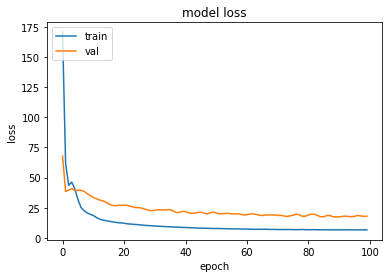

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error as mse
mse(linear_model.predict(X_test_np), y_test_np)

1/1 [==============================] - 0s 34ms/step


3.307457718107918

#5. Non-Linear Model

In [68]:
non_linear_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(8,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='linear')
])

In [69]:
non_linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
Total params: 2,130
Trainable params: 2,130
Non-trainable params: 0
_________________________________________________________________


In [70]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

In [71]:
non_linear_model.compile(optimizer=optimizer, loss = weighted_mse)

In [72]:
history = non_linear_model.fit(X_train_np, y_train_np, validation_split = 0.15, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 73ms/step - loss: 165.6166 - val_loss: 38.4874
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 66.7604 - val_loss: 67.6152
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 65.7826 - val_loss: 46.7910
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 46.5696 - val_loss: 41.7272
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 37.4401 - val_loss: 42.6751
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 31.1105 - val_loss: 27.7198
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 24.7856 - val_loss: 24.3405
Epoch 8/30
3/3 [==============================] - 0s 15ms/step - loss: 18.4941 - val_loss: 23.0045
Epoch 9/30
3/3 [==============================] - 0s 16ms/step - loss: 17.6501 - val_loss: 23.3359
Epoch 10/30
3/3 [==============================] - 0s 14ms/step - loss: 16.9093 - val_loss: 21.9955
Epoch 11

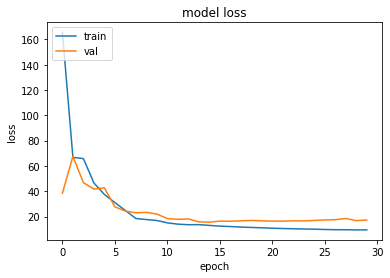

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
mse(non_linear_model.predict(X_test_np), y_test_np)

1/1 [==============================] - 0s 26ms/step


4.6997997509226614

Linear model seems to work better.

#6. Model Predictions

In [74]:
def process_input(user_list):

  OS_input, Budget_input, Size_input, Camera_Importance_input, Usage_input, Pay_More_For_Performance_input = user_list
  processed_input = []

  if OS_input == 'Must be Android':
    processed_input += [1,0,0]
  elif OS_input == 'Must be iPhone':
    processed_input += [0,1,0]
  else:
    processed_input += [0,0,1]

  processed_input += [Budget_categories[Budget_input]]
  processed_input += [Size_categories[Size_input]]
  processed_input += [Camera_Importance_categories[Camera_Importance_input]]
  processed_input += [Usage_categories[Usage_input]]
  processed_input += [Pay_More_For_Performance_categories[Pay_More_For_Performance_input]]

  return processed_input


In [75]:
phones = ['Apple iPhone 11',
 'Apple iPhone 12',
 'Apple iPhone 12 mini',
 'Apple iPhone 13',
 'Apple iPhone 13 mini',
 'Apple iPhone 13 Pro',
 'Apple iPhone 13 Pro Max',
 'Apple iPhone SE (2022)',
 'Google Pixel 5a',
 'Google Pixel 6',
 'Google Pixel 6 Pro',
 'Motorola Edge (2021)',
 'Motorola Edge 30 Pro',
 'Motorola Moto G Stylus',
 'Motorola Moto G100',
 'OnePlus 8T',
 'OnePlus 9',
 'OnePlus 9 Pro',
 'OnePlus Nord N200',
 'Samsung Galaxy A13',
 'Samsung Galaxy A32',
 'Samsung Galaxy A42',
 'Samsung Galaxy A53',
 'Samsung Galaxy S20 FE',
 'Samsung Galaxy S21 FE',
 'Samsung Galaxy S22',
 'Samsung Galaxy S22 Ultra',
 'Samsung Galaxy S22+',
 'Sony Xperia 1 III',
 'Sony Xperia 5 III']

In [76]:
def predict_top_3_ranking(user_list, model_selection = 'linear'):

  processed_input = process_input(user_list)
  processed_input = np.reshape(np.array(processed_input).astype(float), (1,8))
  
  if model_selection == 'non_linear':
    third_id, second_id, top_id = np.argsort(non_linear_model.predict(processed_input).flatten())[-3:]
  else:
    third_id, second_id, top_id = np.argsort(linear_model.predict(processed_input).flatten())[-3:]

  return [phones[top_id], phones[second_id], phones[third_id]]

In [77]:
output = predict_top_3_ranking(['Must be iPhone','$800','Medium','A little','4 - 8','I need speed'], 'linear')
print(output)

1/1 [==============================] - 0s 50ms/step
['Apple iPhone 13 Pro Max', 'Apple iPhone 13 mini', 'Apple iPhone 13']


In [80]:
output = predict_top_3_ranking(['Must be Android','$800','Medium','A little','4 - 8','I need speed'], 'non_linear')
print(output)

1/1 [==============================] - 0s 36ms/step
['Google Pixel 6', 'Samsung Galaxy S22+', 'Sony Xperia 1 III']
